<a href="https://colab.research.google.com/github/VICTORIA-OKESIPE/AIMSCmr_2020/blob/master/KaggleX_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem**


---


SuperLender is a local digital lending company, which prides itself in its effective use of credit risk models to deliver profitable and high-impact loan alternative. Its assessment approach is based on two main risk drivers of loan default prediction:. 1) willingness to pay and 2) ability to pay. Since not all customers pay back, the company invests in experienced data scientist to build robust models to effectively predict the odds of repayment.

These two fundamental drivers need to be determined at the point of each application to allow the credit grantor to make a calculated decision based on repayment odds, which in turn determines if an applicant should get a loan, and if so - what the size, price and tenure of the offer will be.

There are two types of risk models in general: New business risk, which would be used to assess the risk of application(s) associated with the first loan that he/she applies. The second is a repeat or behaviour risk model, in which case the customer has been a client and applies for a repeat loan. In the latter case - we will have additional performance on how he/she repaid their prior loans, which we can incorporate into our risk model.

It is your job to predict if a loan was good or bad, i.e. accurately predict binary outcome variable, where Good is 1 and Bad is 0.


There are 3 different datasets for both train and test.

* Demographic data (traindemographics.csv)
* Performance data (trainperf.csv) : This is the repeat loan that the customer has taken for which we need to predict the performance of. Basically, we need to predict whether this loan would default given all previous loans and demographics of a customer.
* Previous loans data (trainprevloans.csv) : This dataset contains all previous loans that the customer had prior to the loan above that we want to predict the performance of. Each loan will have a different systemloanid, but the same customerid for each customer.




---
About
There are 3 different datasets for both train and test.

Note that the sample submission has 2 outcomes- good (1) or bad (0).

(a) Demographic data (traindemographics.csv)

- customerid (Primary key used to merge to other data)
- birthdate (date of birth of the customer)
- bank_account_type (type of primary bank account)
- longitude_gps
- latitude_gps
- bank_name_clients (name of the bank)
- bank_branch_clients (location of the branch - not compulsory - so missing in lot of the cases)
- employment_status_clients (type of employment that customer has)
- level_of_education_clients (highest level of education)

(b) Performance data (trainperf.csv) : This is the repeat loan that the customer has taken for which we need to predict the performance of. Basically, we need to predict whether this loan would default given all previous loans and demographics of a customer.

- customerid (Primary key used to merge to other data)
- systemloanid (The id associated with the particular loan. The same customerId can have multiple systemloanid’s for each loan he/she has taken out)
- loannumber (The number of the loan that you have to predict)
- approveddate (Date that loan was approved)
- creationdate (Date that loan application was created)
- loanamount (Loan value taken)
- totaldue (Total repayment required to settle the loan - this is the capital loan value disbursed +interest and fees)
- termdays (Term of loan)
- referredby (customerId of the customer that referred this person - is missing, then not referred)
- good_bad_flag (good = settled loan on time; bad = did not settled loan on time) - this is the target variable that we need to predict

(c) Previous loans data (trainprevloans.csv) : This dataset contains all previous loans that the customer had prior to the loan above that we want to predict the performance of. Each loan will have a different systemloanid, but the same customerid for each customer.

- customerid (Primary key used to merge to other data)
- systemloanid (The id associated with the particular loan. The same customerId can have multiple systemloanid’s for each loan he/she has taken out)
- loannumber (The number of the loan that you have to predict)
- approveddate (Date that loan was approved)
- creationdate (Date that loan application was created)
- loanamount (Date that loan application was created)
- totaldue (Total repayment required to settle the loan - this is the capital loan value disbursed +interest and fees) termdays (Term of loan)
- closeddate (Date that the loan was settled)
- referredby (customerId of the customer that referred this person - is missing, then not refrerred)
- firstduedate (Date of first payment due in cases where the term is longer than 30 days. So in the case where the term is 60+ days - then there are multiple monthly payments due - and this dates reflects the date of the first payment)
firstrepaiddate (Actual date that he/she paid the first payment as defined above)



 

# **Approach**


This is a classification problem where our we are to predict where a customer falls into i.e whether he/she falls into approved for loan (1) or dissapproved to acquire a loan (0).

Some of the models in mind are ;
* Naive Bayes
* Decision Tree
* Logistic Regression
* KNN
* Artificial Neural network


---



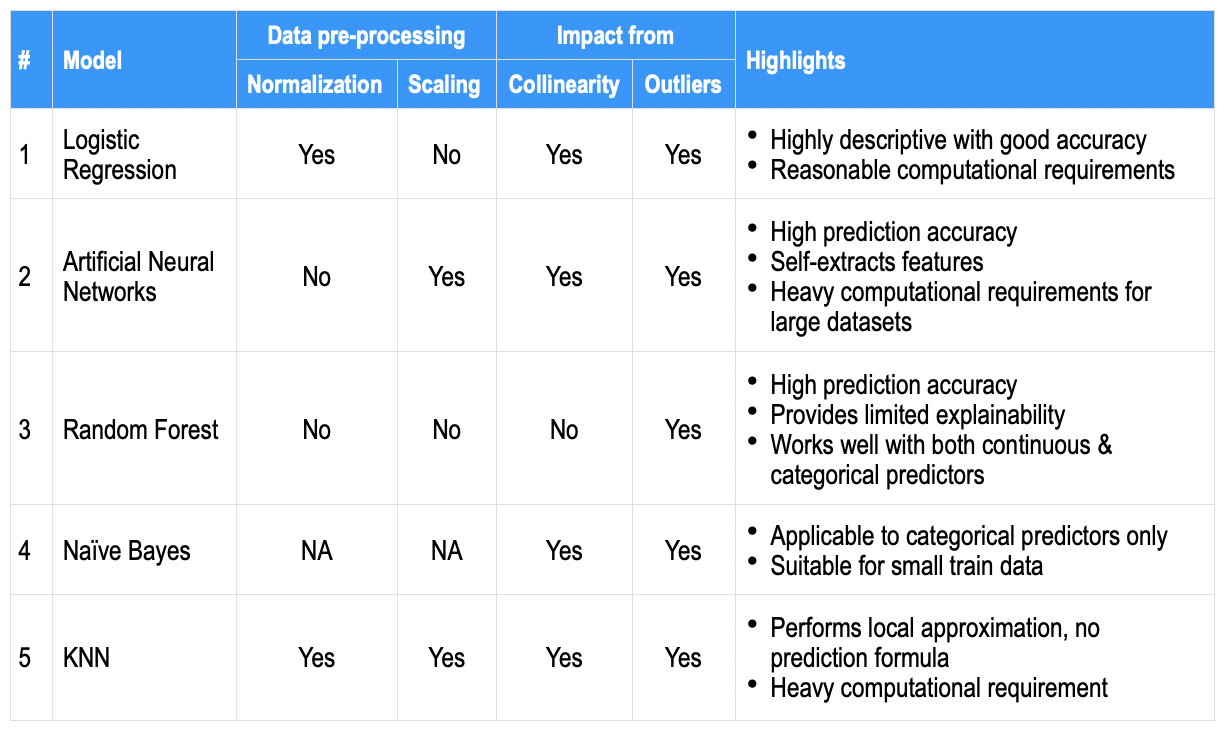


---
### Framework

* Scikit-Learn
* Tensorflow

---
### Process

* Data Preparation
* Exploratory Data Analysis
* Training Models
* Evaluating Models
* Retaining Models


# **Data Collection and Prep**

In [ ]:
import pandas as pd

In [ ]:
#https://github.com/samkamau81/KaggleX-BIPOC-Project/blob/main/traindemographics.csv
#https://github.com/samkamau81/KaggleX-BIPOC-Project/blob/main/trainperf.csv
#https://github.com/samkamau81/KaggleX-BIPOC-Project/blob/main/trainprevloans.csv
demographic_data=pd.read_csv("https://github.com/samkamau81/KaggleX-BIPOC-Project/raw/main/traindemographics.csv" ,index_col=0)
performance_data=pd.read_csv("https://github.com/samkamau81/KaggleX-BIPOC-Project/raw/main/trainperf.csv",index_col=0)
prev_loan_data=pd.read_csv("https://github.com/samkamau81/KaggleX-BIPOC-Project/raw/main/trainprevloans.csv",index_col=0)


## **Demographic Data**

In [ ]:
demographic_data.head(10)

,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
customerid,,,,,,,,
8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN
8a858f045bc9690c015bca251e9a4e95,1978-12-11 00:00:00.000000,Savings,3.330087,6.552518,GT Bank,NaN,Permanent,NaN
8a858ea05a859123015a8892914d15b7,1990-07-21 00:00:00.000000,Savings,3.365935,6.564823,Access Bank,NaN,Permanent,NaN
8a858f275c451af5015c546a50ce55ed,1986-09-09 00:00:00.000000,Savings,4.734382,7.606868,GT Bank,NaN,Permanent,NaN
8a858f405d13c45f015d13dd93ec0c1c,1992-11-17 00:00:00.000000,Savings,3.290590,6.612075,EcoBank,NaN,Permanent,NaN


In [ ]:
demographic_data.reset_index(inplace=True)
demographic_data.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [ ]:
demographic_data.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients'],
      dtype='object')

In [ ]:
demographic_data.shape

(4346, 9)

In [ ]:

demographic_data.describe()


,longitude_gps,latitude_gps
count,4346.000000,4346.000000
mean,4.626189,7.251356
std,7.184832,3.055052
min,-118.247009,-33.868818
25%,3.354953,6.470610
50%,3.593302,6.621888
75%,6.545220,7.425052
max,151.209290,71.228069


In [ ]:
demographic_data.dtypes

customerid                     object
birthdate                      object
bank_account_type              object
longitude_gps                 float64
latitude_gps                  float64
bank_name_clients              object
bank_branch_clients            object
employment_status_clients      object
level_of_education_clients     object
dtype: object

In [ ]:
demographic_data.corr()

,longitude_gps,latitude_gps
longitude_gps,1.000000,-0.172954
latitude_gps,-0.172954,1.000000


## **Performance Data**

In [ ]:
performance_data.head(10)

,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
customerid,,,,,,,,,
8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good
8a8589f35451855401546b0738c42524,301986516,8,2017-07-19 21:46:24.000000,2017-07-19 20:46:18.000000,30000.0,39000.0,60,NaN,Good
8a858e095c59b91b015c5e5cea3719bc,301972027,3,2017-07-10 19:25:33.000000,2017-07-10 18:25:28.000000,10000.0,13000.0,30,NaN,Good
8a858e1158dc4d830158f7bde4f47ea7,301994428,10,2017-07-24 23:42:27.000000,2017-07-24 22:42:21.000000,30000.0,34500.0,30,NaN,Good
8a858e185b4923b4015b4ae48d28646a,301996687,4,2017-07-26 10:53:05.000000,2017-07-26 09:52:57.000000,10000.0,11500.0,15,NaN,Good


In [ ]:
performance_data.reset_index(inplace=True)
performance_data.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [ ]:
performance_data.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby',
       'good_bad_flag'],
      dtype='object')

In [ ]:
performance_data.shape

(4368, 10)

In [ ]:
performance_data.dtypes

customerid        object
systemloanid       int64
loannumber         int64
approveddate      object
creationdate      object
loanamount       float64
totaldue         float64
termdays           int64
referredby        object
good_bad_flag     object
dtype: object

In [ ]:
performance_data.corr()

,systemloanid,loannumber,loanamount,totaldue,termdays
systemloanid,1.000000,-0.046542,-0.057324,-0.061628,-0.065113
loannumber,-0.046542,1.000000,0.833318,0.815303,0.405131
loanamount,-0.057324,0.833318,1.000000,0.994392,0.558818
totaldue,-0.061628,0.815303,0.994392,1.000000,0.627599
termdays,-0.065113,0.405131,0.558818,0.627599,1.000000


## **Previous Loan Data**

In [ ]:
prev_loan_data.head(10)

,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
customerid,,,,,,,,,,,
8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000
8a858970548359cc0154883481981866,301832407,5,2017-03-06 13:25:17.000000,2017-03-06 12:25:10.000000,20000.0,23800.0,30,2017-04-04 15:46:56.000000,NaN,2017-04-05 00:00:00.000000,2017-04-04 15:31:47.000000
8a858970548359cc0154883481981866,301926513,8,2017-06-04 01:00:23.000000,2017-06-04 00:00:16.000000,30000.0,39000.0,60,2017-07-03 23:35:38.000000,NaN,2017-07-04 00:00:00.000000,2017-07-03 23:25:29.000000
8a8589f35451855401546b0738c42524,301912443,6,2017-05-18 09:42:18.000000,2017-05-18 08:41:12.000000,20000.0,24500.0,30,2017-06-19 10:10:35.000000,NaN,2017-06-19 00:00:00.000000,2017-06-19 10:00:21.000000
8a858e095c59b91b015c5e5cea3719bc,301936857,2,2017-06-13 08:26:31.000000,2017-06-13 07:26:24.000000,10000.0,13000.0,30,2017-07-10 13:32:03.000000,NaN,2017-07-13 00:00:00.000000,2017-07-10 13:21:53.000000


In [ ]:
prev_loan_data.reset_index(inplace=True)
prev_loan_data.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [ ]:
prev_loan_data.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'closeddate',
       'referredby', 'firstduedate', 'firstrepaiddate'],
      dtype='object')

In [ ]:
prev_loan_data.shape

(18183, 12)

In [ ]:
prev_loan_data.describe()

,systemloanid,loannumber,loanamount,totaldue,termdays
count,1.818300e+04,18183.000000,18183.000000,18183.000000,18183.000000
mean,3.018395e+08,4.189353,16501.237420,19573.202931,26.692790
std,9.367767e+04,3.249490,9320.547516,10454.245277,10.946556
min,3.016001e+08,1.000000,3000.000000,3450.000000,15.000000
25%,3.017766e+08,2.000000,10000.000000,11500.000000,15.000000
50%,3.018550e+08,3.000000,10000.000000,13000.000000,30.000000
75%,3.019197e+08,6.000000,20000.000000,24500.000000,30.000000
max,3.020003e+08,26.000000,60000.000000,68100.000000,90.000000


In [ ]:
prev_loan_data.dtypes

customerid          object
systemloanid         int64
loannumber           int64
approveddate        object
creationdate        object
loanamount         float64
totaldue           float64
termdays             int64
closeddate          object
referredby          object
firstduedate        object
firstrepaiddate     object
dtype: object

In [ ]:
prev_loan_data.corr()

,systemloanid,loannumber,loanamount,totaldue,termdays
systemloanid,1.000000,0.170905,0.119215,0.117780,0.046271
loannumber,0.170905,1.000000,0.798862,0.785038,0.368215
loanamount,0.119215,0.798862,1.000000,0.995142,0.520504
totaldue,0.117780,0.785038,0.995142,1.000000,0.593770
termdays,0.046271,0.368215,0.520504,0.593770,1.000000


# **Exploratory Data Analysis**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Coming up with graphs showing Relationships between different parameters considered during loan approval procedure;

* Date of Birth - bar graph
* Location - Seaborn Map
* Bank name -Pie chart
* Employement status - Pie Chart
* Level of education - Pie Chart

In [ ]:
demographic_data['birthdate'].head(10)
demographic_data['birthdate'].tail(10)

4336    1990-02-17 00:00:00.000000
4337    1967-06-26 00:00:00.000000
4338    1982-10-19 00:00:00.000000
4339    1986-02-16 00:00:00.000000
4340    1983-06-07 00:00:00.000000
4341    1985-12-13 00:00:00.000000
4342    1982-07-01 00:00:00.000000
4343    1989-09-26 00:00:00.000000
4344    1985-09-06 00:00:00.000000
4345    1975-06-05 00:00:00.000000
Name: birthdate, dtype: object

In [ ]:
demographic_data['birthdate'].count()

4346

In [ ]:
demographic_data['Year'] = demographic_data['birthdate'].apply(lambda x: str(x)[:4])
demographic_data['Year']

0       1973
1       1986
2       1987
3       1991
4       1982
        ... 
4341    1985
4342    1982
4343    1989
4344    1985
4345    1975
Name: Year, Length: 4346, dtype: object

In [ ]:
demographic_data.groupby(['Year'])['Year'].count()

Year
1961      2
1962      9
1963      6
1964      9
1965     14
1966     10
1967     13
1968     20
1969     18
1970     33
1971     23
1972     48
1973     41
1974     71
1975     91
1976     97
1977    110
1978    142
1979    150
1980    203
1981    187
1982    237
1983    262
1984    301
1985    289
1986    324
1987    275
1988    282
1989    250
1990    230
1991    160
1992    176
1993    126
1994     80
1995     53
1996      4
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year'>

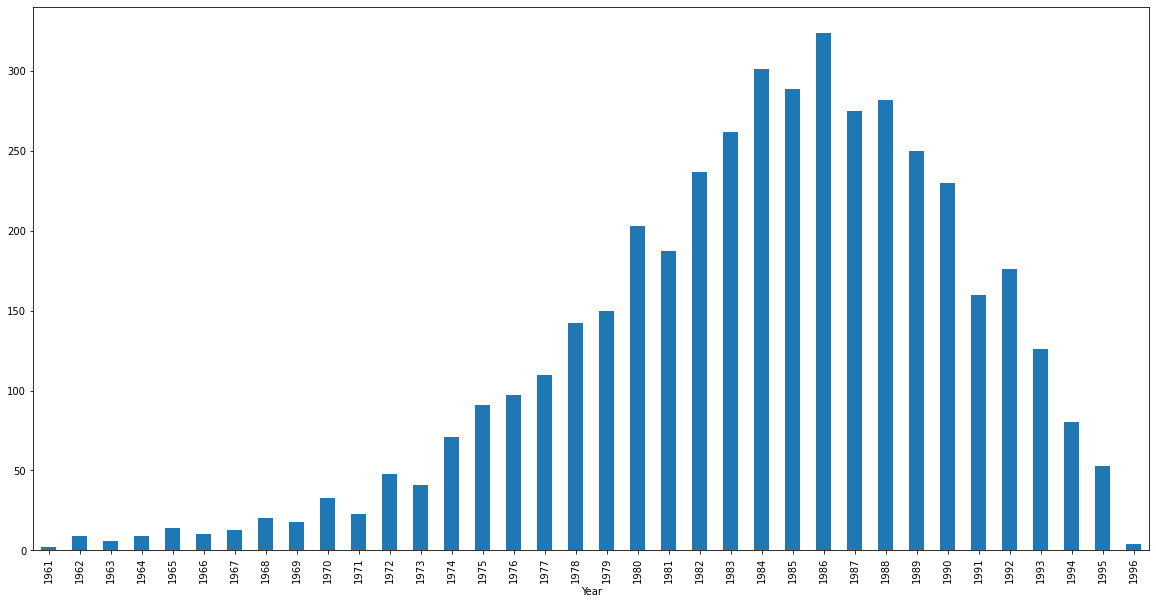

In [ ]:
demographic_data.pivot_table(columns=['Year'],aggfunc='size').plot(kind='bar', figsize = (20, 10))

Reason : 

In [ ]:
demographic_data.groupby(['bank_name_clients'])['bank_name_clients'].count()

bank_name_clients
Access Bank            432
Diamond Bank           282
EcoBank                150
FCMB                   121
Fidelity Bank          103
First Bank             590
GT Bank               1598
Heritage Bank           22
Keystone Bank           19
Skye Bank              102
Stanbic IBTC           145
Standard Chartered      15
Sterling Bank           55
UBA                    353
Union Bank              23
Unity Bank               7
Wema Bank               28
Zenith Bank            301
Name: bank_name_clients, dtype: int64

<AxesSubplot:xlabel='bank_name_clients'>

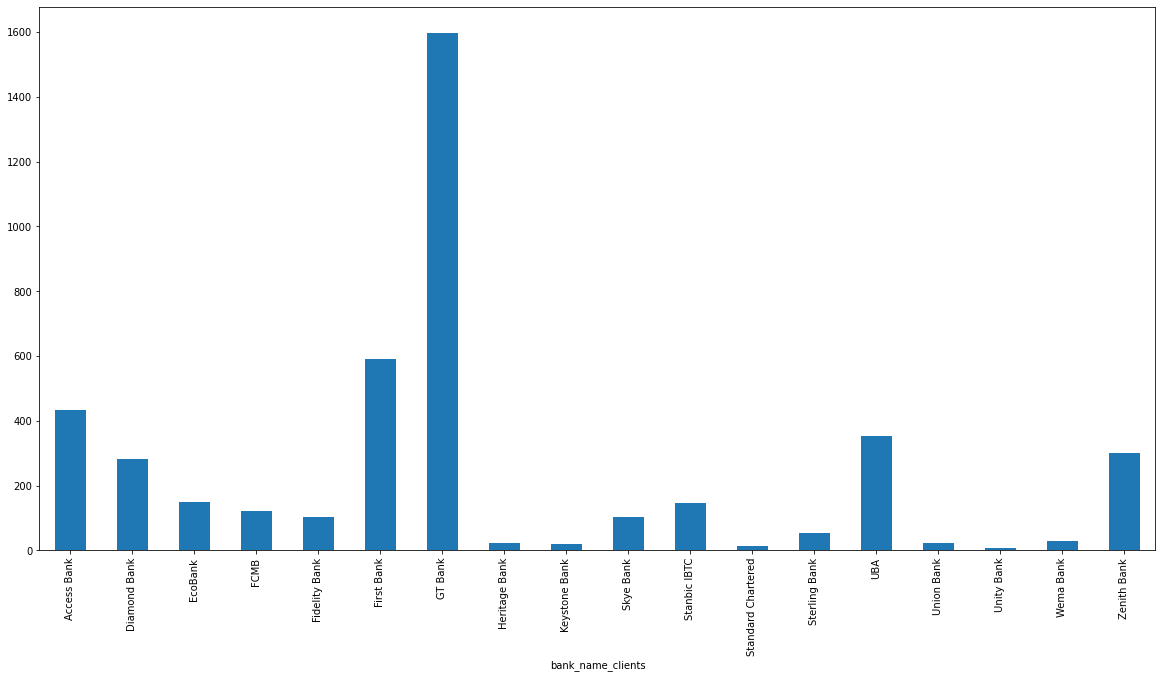

In [ ]:
demographic_data.pivot_table(columns=['bank_name_clients'],aggfunc='size').plot(kind='bar', figsize = (20, 10))

Reason:

In [ ]:
demographic_data.groupby(['employment_status_clients'])['employment_status_clients'].count()

employment_status_clients
Contract            1
Permanent        3146
Retired             4
Self-Employed     348
Student           142
Unemployed         57
Name: employment_status_clients, dtype: int64

<AxesSubplot:ylabel='None'>

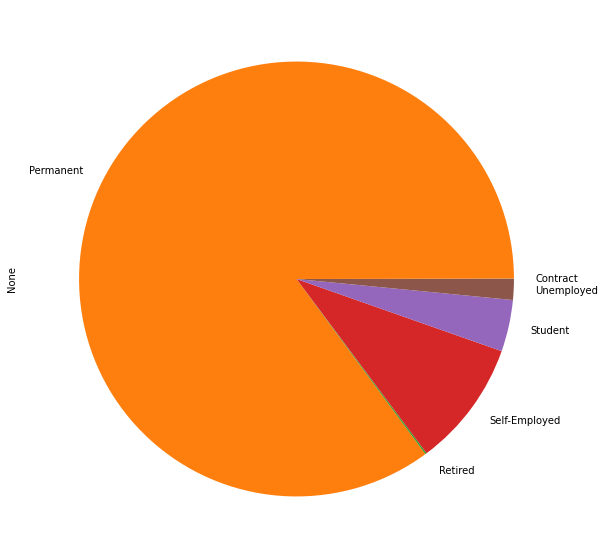

In [ ]:
demographic_data.pivot_table(columns=['employment_status_clients'],aggfunc='size').plot(kind='pie', figsize = (20, 10))

In [ ]:
demographic_data.groupby(['level_of_education_clients'])['level_of_education_clients'].count()

level_of_education_clients
Graduate         420
Post-Graduate     68
Primary           10
Secondary         89
Name: level_of_education_clients, dtype: int64

<AxesSubplot:ylabel='None'>

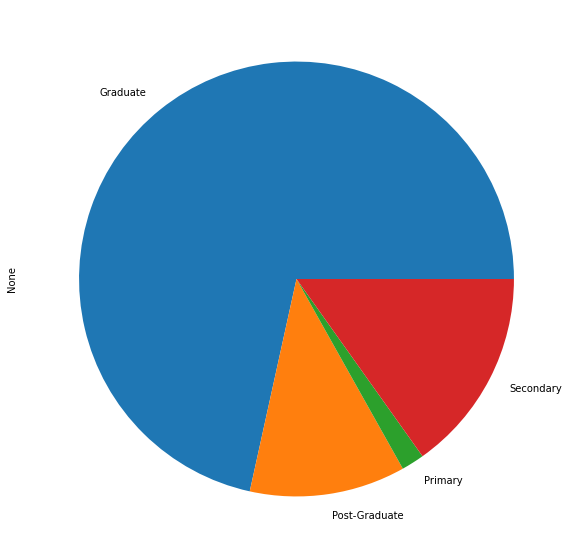

In [ ]:
demographic_data.pivot_table(columns=['level_of_education_clients'],aggfunc='size').plot(kind='pie', figsize = (20, 10))

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.express as px

#'birthdate', 'bank_account_type', 'longitude_gps', 'latitude_gps',
     #  'bank_name_clients', 'bank_branch_clients', 'employment_status_clients',
    #   'level_of_education_clients'
fig = px.scatter_geo(demographic_data, lat='latitude_gps', lon='longitude_gps', hover_name="bank_name_clients")

fig.show()

<AxesSubplot:xlabel='latitude_gps', ylabel='longitude_gps'>

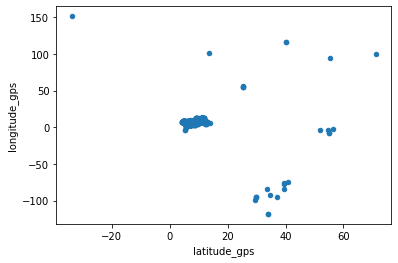

In [ ]:
demographic_data.plot(x="latitude_gps", y="longitude_gps", kind="scatter")

In [ ]:
Age=[]
for i in demographic_data['Year']:
  Age.append(2017-int(i))


demographic_data['Age']=Age
demographic_data[['Age','Year']]

,Age,Year
0,44,1973
1,31,1986
2,30,1987
3,26,1991
4,35,1982
...,...,...
4341,32,1985
4342,35,1982
4343,28,1989
4344,32,1985


# **Merging Datasets**

In [ ]:
merged_data=pd.merge(demographic_data, performance_data, on='customerid',)
merged_data.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,Year,Age,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN,1973,44,301964962,2,2017-07-05 14:29:48.000000,2017-07-05 13:29:42.000000,10000.0,13000.0,30,8a858899538ddb8e0153a780c56e34bb,Good
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN,1986,31,301972172,2,2017-07-10 21:21:46.000000,2017-07-10 20:21:40.000000,10000.0,13000.0,30,NaN,Bad
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,1987,30,301976271,4,2017-07-13 15:40:27.000000,2017-07-13 14:40:19.000000,10000.0,13000.0,30,NaN,Good
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN,1991,26,301997763,2,2017-07-26 21:03:17.000000,2017-07-26 20:03:09.000000,10000.0,11500.0,15,NaN,Good
4,8a858ea05a859123015a8892914d15b7,1990-07-21 00:00:00.000000,Savings,3.365935,6.564823,Access Bank,NaN,Permanent,NaN,1990,27,301992494,6,2017-07-23 21:44:43.000000,2017-07-23 20:44:36.000000,20000.0,24500.0,30,NaN,Good


In [ ]:
merged_data.shape

(3277, 20)

In [ ]:
final_merged_data=pd.merge(merged_data, prev_loan_data, on='customerid')
final_merged_data.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,Year,...,loannumber_y,approveddate_y,creationdate_y,loanamount_y,totaldue_y,termdays_y,closeddate,referredby_y,firstduedate,firstrepaiddate
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN,1973,...,1,2017-06-19 17:55:26.000000,2017-06-19 16:54:19.000000,10000.0,11500.0,15,2017-07-04 18:09:47.000000,8a858899538ddb8e0153a780c56e34bb,2017-07-05 00:00:00.000000,2017-07-04 17:59:36.000000
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN,1986,...,1,2017-06-07 12:47:30.000000,2017-06-07 11:46:22.000000,10000.0,13000.0,30,2017-07-10 08:52:54.000000,NaN,2017-07-07 00:00:00.000000,2017-07-10 08:42:44.000000
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,1987,...,3,2017-06-08 11:49:34.000000,2017-06-08 10:49:27.000000,10000.0,13000.0,30,2017-07-11 10:12:20.000000,NaN,2017-07-10 00:00:00.000000,2017-07-11 10:02:11.000000
3,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,1987,...,1,2017-05-08 11:07:01.000000,2017-05-08 10:06:40.000000,10000.0,11500.0,15,2017-05-27 13:02:53.000000,NaN,2017-05-23 00:00:00.000000,2017-05-27 12:52:45.000000
4,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,1987,...,2,2017-05-27 17:10:41.000000,2017-05-27 16:10:34.000000,10000.0,11500.0,15,2017-06-08 11:13:50.000000,NaN,2017-06-12 00:00:00.000000,2017-06-08 11:03:40.000000


In [ ]:
final_merged_data.shape

(13693, 31)

In [ ]:
final_merged_data.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients', 'Year',
       'Age', 'systemloanid_x', 'loannumber_x', 'approveddate_x',
       'creationdate_x', 'loanamount_x', 'totaldue_x', 'termdays_x',
       'referredby_x', 'good_bad_flag', 'systemloanid_y', 'loannumber_y',
       'approveddate_y', 'creationdate_y', 'loanamount_y', 'totaldue_y',
       'termdays_y', 'closeddate', 'referredby_y', 'firstduedate',
       'firstrepaiddate'],
      dtype='object')

In [ ]:
final_merged_data.to_csv("finalDataset.xls", index=False)

In [ ]:
final_merged_data.dtypes

customerid                     object
birthdate                      object
bank_account_type              object
longitude_gps                 float64
latitude_gps                  float64
bank_name_clients              object
bank_branch_clients            object
employment_status_clients      object
level_of_education_clients     object
Year                           object
Age                             int64
systemloanid_x                  int64
loannumber_x                    int64
approveddate_x                 object
creationdate_x                 object
loanamount_x                  float64
totaldue_x                    float64
termdays_x                      int64
referredby_x                   object
good_bad_flag                  object
systemloanid_y                  int64
loannumber_y                    int64
approveddate_y                 object
creationdate_y                 object
loanamount_y                  float64
totaldue_y                    float64
termdays_y  

## **Dealing with Missing Values**

In [ ]:
final_merged_data.isna().sum()

customerid                        0
birthdate                         0
bank_account_type                 0
longitude_gps                     0
latitude_gps                      0
bank_name_clients                 0
bank_branch_clients           13589
employment_status_clients      1363
level_of_education_clients    10229
Year                              0
Age                               0
systemloanid_x                    0
loannumber_x                      0
approveddate_x                    0
creationdate_x                    0
loanamount_x                      0
totaldue_x                        0
termdays_x                        0
referredby_x                  12891
good_bad_flag                     0
systemloanid_y                    0
loannumber_y                      0
approveddate_y                    0
creationdate_y                    0
loanamount_y                      0
totaldue_y                        0
termdays_y                        0
closeddate                  

In [ ]:
final_merged_data.drop(['bank_branch_clients','referredby_x','referredby_y'], axis=1, inplace=True)

In [ ]:
final_merged_data['employment_status_clients'].fillna(final_merged_data['employment_status_clients'].mode()[0], inplace=True)
final_merged_data['level_of_education_clients'].fillna('Graduate', inplace=True)
final_merged_data.isna().sum() 

customerid                    0
birthdate                     0
bank_account_type             0
longitude_gps                 0
latitude_gps                  0
bank_name_clients             0
employment_status_clients     0
level_of_education_clients    0
Year                          0
Age                           0
systemloanid_x                0
loannumber_x                  0
approveddate_x                0
creationdate_x                0
loanamount_x                  0
totaldue_x                    0
termdays_x                    0
good_bad_flag                 0
systemloanid_y                0
loannumber_y                  0
approveddate_y                0
creationdate_y                0
loanamount_y                  0
totaldue_y                    0
termdays_y                    0
closeddate                    0
firstduedate                  0
firstrepaiddate               0
dtype: int64

In [ ]:
final_merged_data.tail(10)

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Year,Age,...,systemloanid_y,loannumber_y,approveddate_y,creationdate_y,loanamount_y,totaldue_y,termdays_y,closeddate,firstduedate,firstrepaiddate
13683,8a85897353d85af80153d8a368020159,1983-06-07 00:00:00.000000,Other,7.046360,5.499944,UBA,Self-Employed,Graduate,1983,34,...,301887233,10,2017-05-02 14:55:02.000000,2017-05-02 13:54:47.000000,30000.0,36800.0,60,2017-07-03 05:40:40.000000,2017-06-01 00:00:00.000000,2017-05-30 14:46:38.000000
13684,8a85897353d85af80153d8a368020159,1983-06-07 00:00:00.000000,Other,7.046360,5.499944,UBA,Self-Employed,Graduate,1983,34,...,301607037,1,2016-04-02 21:31:41.000000,2016-04-02 20:31:34.000000,5000.0,5750.0,15,2016-04-14 00:02:51.000000,2016-04-18 00:00:00.000000,2016-04-13 16:31:35.000000
13685,8a85897353d85af80153d8a368020159,1983-06-07 00:00:00.000000,Other,7.046360,5.499944,UBA,Self-Employed,Graduate,1983,34,...,301612849,2,2016-04-21 07:26:21.000000,2016-04-21 06:26:16.000000,10000.0,11500.0,15,2016-05-07 00:02:31.000000,2016-05-06 00:00:00.000000,2016-05-06 08:46:59.000000
13686,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,Permanent,Graduate,1985,32,...,301943912,6,2017-06-19 17:11:44.000000,2017-06-19 16:11:37.000000,20000.0,24000.0,30,2017-07-19 12:23:05.000000,2017-07-19 00:00:00.000000,2017-07-19 12:12:56.000000
13687,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,Permanent,Graduate,1985,32,...,301795339,2,2017-01-17 16:13:40.000000,2017-01-17 15:13:26.000000,10000.0,13000.0,30,2017-02-17 00:39:37.000000,2017-02-17 00:00:00.000000,2017-02-17 00:16:03.000000
13688,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,Permanent,Graduate,1985,32,...,301633289,1,2016-06-16 08:36:03.000000,2016-06-16 07:35:56.000000,10000.0,11500.0,15,2016-07-05 23:59:54.000000,2016-07-01 00:00:00.000000,2016-07-05 23:44:51.000000
13689,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,Permanent,Graduate,1985,32,...,301918076,5,2017-05-25 13:39:27.000000,2017-05-25 12:39:21.000000,10000.0,13000.0,30,2017-06-19 17:03:34.000000,2017-06-26 00:00:00.000000,2017-06-19 16:53:24.000000
13690,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,Permanent,Graduate,1985,32,...,301824314,3,2017-02-22 17:16:36.000000,2017-02-22 16:16:28.000000,10000.0,13000.0,30,2017-03-23 19:19:20.000000,2017-03-24 00:00:00.000000,2017-03-23 19:04:10.000000
13691,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,Permanent,Graduate,1985,32,...,301874438,4,2017-04-20 12:21:24.000000,2017-04-20 11:21:09.000000,10000.0,13000.0,30,2017-05-21 10:07:50.000000,2017-05-22 00:00:00.000000,2017-05-21 09:52:41.000000
13692,8a858fc65cf978f4015cf97cee3a02ce,1982-07-01 00:00:00.000000,Savings,7.013750,4.875662,GT Bank,Permanent,Graduate,1982,35,...,301960158,1,2017-07-02 17:50:14.000000,2017-07-02 16:49:05.000000,10000.0,11500.0,15,2017-07-16 06:31:38.000000,2017-07-18 00:00:00.000000,2017-07-16 06:21:28.000000


In [ ]:
final_merged_data.dtypes

customerid                     object
birthdate                      object
bank_account_type              object
longitude_gps                 float64
latitude_gps                  float64
bank_name_clients              object
employment_status_clients      object
level_of_education_clients     object
Year                           object
Age                             int64
systemloanid_x                  int64
loannumber_x                    int64
approveddate_x                 object
creationdate_x                 object
loanamount_x                  float64
totaldue_x                    float64
termdays_x                      int64
good_bad_flag                  object
systemloanid_y                  int64
loannumber_y                    int64
approveddate_y                 object
creationdate_y                 object
loanamount_y                  float64
totaldue_y                    float64
termdays_y                      int64
closeddate                     object
firstduedate

In [ ]:
final_merged_data['Year'].unique()

array(['1973', '1986', '1987', '1991', '1990', '1992', '1994', '1970',
       '1988', '1989', '1983', '1984', '1985', '1982', '1977', '1979',
       '1976', '1981', '1995', '1974', '1993', '1966', '1978', '1975',
       '1980', '1967', '1972', '1969', '1971', '1968', '1964', '1965',
       '1963', '1962', '1996', '1961'], dtype=object)

# **Converting Categorical data to Numerical Data**

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [ ]:
train_df=final_merged_data.drop(columns=['customerid','birthdate','systemloanid_x','systemloanid_y','approveddate_x','Year','approveddate_y','creationdate_x','creationdate_y','closeddate','firstduedate','firstrepaiddate'])
print(train_df.columns)
categorical_column=['bank_account_type', 'bank_name_clients','employment_status_clients','level_of_education_clients','good_bad_flag']
numerical_column=['longitude_gps','latitude_gps','loanamount_x','loanamount_y','termdays_y','loanamount_y','totaldue_y','termdays_x','loanamount_x','totaldue_x','loannumber_x','loannumber_y']

Index(['bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'Age', 'loannumber_x', 'loanamount_x',
       'totaldue_x', 'termdays_x', 'good_bad_flag', 'loannumber_y',
       'loanamount_y', 'totaldue_y', 'termdays_y'],
      dtype='object')


In [ ]:
# label_encoder object
label_encoder =LabelEncoder()
# Encode labels in column. 

for i in categorical_column:
  print(i)
  train_df[i]= label_encoder.fit_transform(train_df[i])


bank_account_type
bank_name_clients
employment_status_clients
level_of_education_clients
good_bad_flag


In [ ]:
#### Encoding categrical Features: ##########
#train_df_encoded = pd.get_dummies(train_df,drop_first=True)
#train_df_encoded.head()

In [ ]:
print(train_df.columns)

Index(['bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'Age', 'loannumber_x', 'loanamount_x',
       'totaldue_x', 'termdays_x', 'good_bad_flag', 'loannumber_y',
       'loanamount_y', 'totaldue_y', 'termdays_y'],
      dtype='object')


In [ ]:
train_df.head()

,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Age,loannumber_x,loanamount_x,totaldue_x,termdays_x,good_bad_flag,loannumber_y,loanamount_y,totaldue_y,termdays_y
0,2,3.319219,6.528604,6,1,0,44,2,10000.0,13000.0,30,1,1,10000.0,11500.0,15
1,2,3.325598,7.119403,12,1,0,31,2,10000.0,13000.0,30,0,1,10000.0,13000.0,30
2,2,5.746100,5.563174,4,1,0,30,4,10000.0,13000.0,30,1,3,10000.0,13000.0,30
3,2,5.746100,5.563174,4,1,0,30,4,10000.0,13000.0,30,1,1,10000.0,11500.0,15
4,2,5.746100,5.563174,4,1,0,30,4,10000.0,13000.0,30,1,2,10000.0,11500.0,15


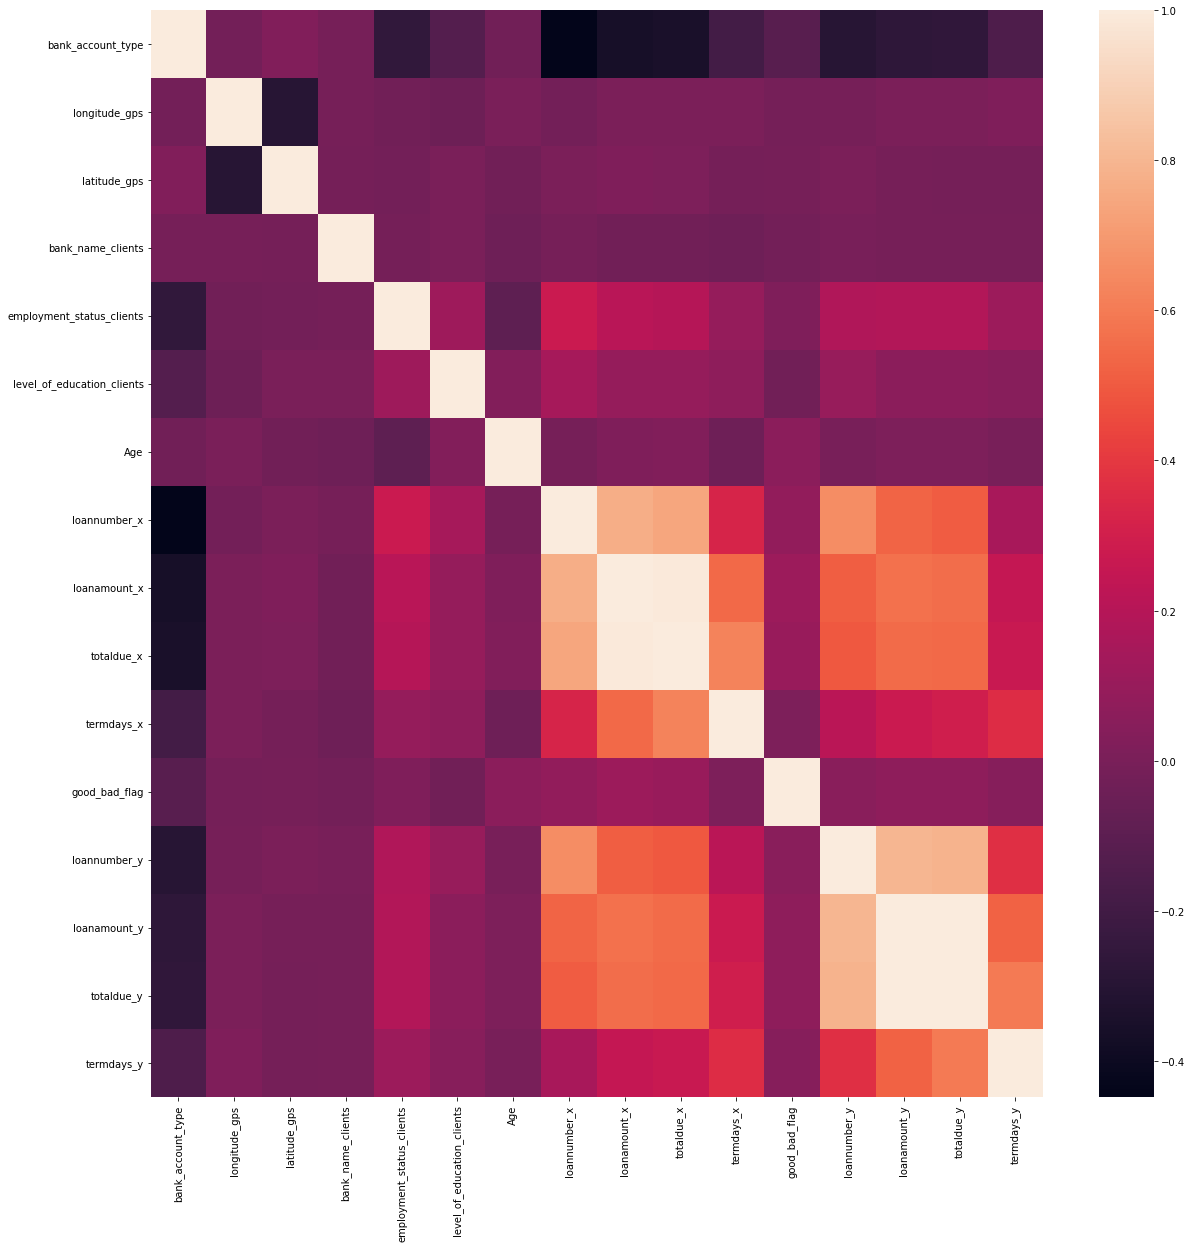

In [ ]:
import seaborn as sb
import matplotlib.pyplot as mp

mp.figure(figsize=(20, 20))
dataplot=sb.heatmap(train_df.corr())
mp.show()


In [ ]:
train_df.corr()

,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Age,loannumber_x,loanamount_x,totaldue_x,termdays_x,good_bad_flag,loannumber_y,loanamount_y,totaldue_y,termdays_y
bank_account_type,1.000000,-0.020633,0.022526,-0.011274,-0.256527,-0.127737,-0.025150,-0.448816,-0.359226,-0.348307,-0.191079,-0.117763,-0.296195,-0.268675,-0.266813,-0.153422
longitude_gps,-0.020633,1.000000,-0.300672,-0.010468,-0.025933,-0.042970,-0.001638,-0.018992,0.008233,0.008558,0.005345,-0.013174,-0.012506,0.007249,0.009109,0.016654
latitude_gps,0.022526,-0.300672,1.000000,-0.018576,-0.024188,0.002544,-0.028131,0.006872,0.016843,0.012612,-0.017252,-0.009620,0.004575,-0.011296,-0.013351,-0.017500
bank_name_clients,-0.011274,-0.010468,-0.018576,1.000000,-0.013794,-0.000521,-0.039070,-0.008023,-0.024463,-0.025613,-0.037575,-0.019232,-0.005344,-0.011565,-0.011997,-0.011917
employment_status_clients,-0.256527,-0.025933,-0.024188,-0.013794,1.000000,0.118445,-0.092675,0.271990,0.208069,0.197913,0.094347,0.016187,0.179634,0.186266,0.186303,0.114942
level_of_education_clients,-0.127737,-0.042970,0.002544,-0.000521,0.118445,1.000000,0.030234,0.150836,0.090393,0.092906,0.071504,-0.028635,0.099834,0.059412,0.060467,0.046452
Age,-0.025150,-0.001638,-0.028131,-0.039070,-0.092675,0.030234,1.000000,-0.008568,0.020871,0.022062,-0.040011,0.057762,-0.005655,0.014268,0.014889,-0.006078
loannumber_x,-0.448816,-0.018992,0.006872,-0.008023,0.271990,0.150836,-0.008568,1.000000,0.773284,0.744855,0.325505,0.080411,0.659946,0.526889,0.506839,0.151975
loanamount_x,-0.359226,0.008233,0.016843,-0.024463,0.208069,0.090393,0.020871,0.773284,1.000000,0.992614,0.544543,0.113026,0.510295,0.566468,0.556789,0.250101
totaldue_x,-0.348307,0.008558,0.012612,-0.025613,0.197913,0.092906,0.022062,0.744855,0.992614,1.000000,0.622725,0.104196,0.491581,0.550423,0.544270,0.266297


In [ ]:
#train_df_encoded.to_csv("train_dataframe.csv", index=False)


# **Machine Learning** 



---




In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report


In [ ]:
########## Split Features and Target Varible ############
X = train_df.drop(columns='good_bad_flag')
y = train_df['good_bad_flag']

################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,stratify =y,random_state =42)

1. **X_train** - This includes my all independent variables,these will be used to train the model, also as I have specified the test_size = 0.3, this means 70% of observations from your complete data will be used to train/fit the model and rest 30% will be used to test the model.

2. **X_test** - This is remaining 30% portion of the independent variables from the data which will not be used in the training phase and will be used to make predictions to test the accuracy of the model.

3. **y_train** - This is my dependent variable which needs to be predicted by this model.

4. **y_test** - This data has category labels for your test data and will be used to test the accuracy between actual and predicted categories.

5. **y_pred** - This is the data predicted (calculated, output) by your model.

---

Accuracy classification score.

In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.


---

Compute the F1 score, also known as balanced F-score or F-measure.
The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

F1 = 2 * (precision * recall) / (precision + recall)

---

It is correct to divide the data into training and test parts and compute the F1 score for each- you want to compare these scores. The point of using a test set is to evaluate the model on truly unseen data so you have an idea of how it will perform in production. **If you see a large drop in performance between the training score and test score it is likely due to the model overfitting.**


---

When using classification models in machine learning, there are three common metrics that we use to assess the quality of the model:

1. Precision: Percentage of correct positive predictions relative to total positive predictions.

2. Recall: Percentage of correct positive predictions relative to total actual positives.

3. F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.

In [ ]:
print(X_test.shape)

print(X_test.columns)

(1370, 15)
Index(['bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'Age', 'loannumber_x', 'loanamount_x',
       'totaldue_x', 'termdays_x', 'loannumber_y', 'loanamount_y',
       'totaldue_y', 'termdays_y'],
      dtype='object')


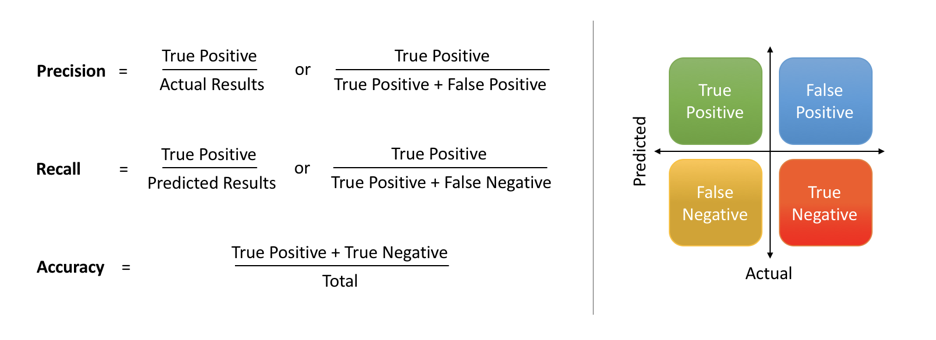

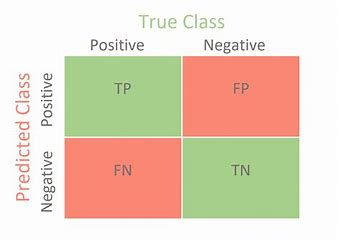

###Logistic Regression

In [ ]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)
print("Training Data Set Accuracy: ", accuracy_score(y_test,y_pred))
print("Training Data F1 Score ", f1_score(y_test,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(logisticRegr,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(logisticRegr,X_train,y_train,cv=5,scoring='accuracy').mean())

print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Training Data Set Accuracy:  0.8153284671532847
Training Data F1 Score  0.8982710092480901
Validation Mean F1 Score:  0.44915291875398883
Validation Mean Accuracy:  0.8153858565369723
Test Accuracy:  0.8153284671532847
Test F1 Score:  0.8982710092480901
Confusion Matrix on Test Data


Predicted,1,All
Actual,,
0,253,253
1,1117,1117
All,1370,1370


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       253
           1       0.82      1.00      0.90      1117

    accuracy                           0.82      1370
   macro avg       0.41      0.50      0.45      1370
weighted avg       0.66      0.82      0.73      1370



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### Decision Tree

In [ ]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test)
print("Training Data Set Accuracy: ", accuracy_score(y_test,y_pred))
print("Training Data F1 Score ", f1_score(y_test,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Training Data Set Accuracy:  0.964963503649635
Training Data F1 Score  0.9784560143626571
Validation Mean F1 Score:  0.9251450128201034
Validation Mean Accuracy:  0.9557738534285187
Test Accuracy:  0.964963503649635
Test F1 Score:  0.9784560143626571
Confusion Matrix on Test Data


Predicted,0,1,All
Actual,,,
0,232,21,253
1,27,1090,1117
All,259,1111,1370


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       253
           1       0.98      0.98      0.98      1117

    accuracy                           0.96      1370
   macro avg       0.94      0.95      0.94      1370
weighted avg       0.97      0.96      0.97      1370



### Random Forests

In [ ]:
# Instantiate and fit the RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print("Training Data Set Accuracy: ", accuracy_score(y_test,y_pred))
print("Training Data F1 Score ", f1_score(y_test,y_pred))


print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())


print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Training Data Set Accuracy:  0.9627737226277372
Training Data F1 Score  0.9776021080368906
Validation Mean F1 Score:  0.9250786641687758
Validation Mean Accuracy:  0.953988270856932
Test Accuracy:  0.9627737226277372
Test F1 Score:  0.9776021080368906
Confusion Matrix on Test Data


Predicted,0,1,All
Actual,,,
0,206,47,253
1,4,1113,1117
All,210,1160,1370


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89       253
           1       0.96      1.00      0.98      1117

    accuracy                           0.96      1370
   macro avg       0.97      0.91      0.93      1370
weighted avg       0.96      0.96      0.96      1370




### Artificial Neural Networks



In [ ]:
Ann_clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1)
Ann_clf.fit(X_train, y_train)
y_pred = Ann_clf.predict(X_test)
print("Training Data Set Accuracy: ", accuracy_score(y_test,y_pred))
print("Training Data F1 Score ", f1_score(y_test,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Training Data Set Accuracy:  0.789051094890511
Training Data F1 Score  0.8803312629399587
Validation Mean F1 Score:  0.9236475426918487
Validation Mean Accuracy:  0.9547997615974289
Test Accuracy:  0.789051094890511
Test F1 Score:  0.8803312629399587
Confusion Matrix on Test Data


Predicted,0,1,All
Actual,,,
0,18,235,253
1,54,1063,1117
All,72,1298,1370


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.07      0.11       253
           1       0.82      0.95      0.88      1117

    accuracy                           0.79      1370
   macro avg       0.53      0.51      0.50      1370
weighted avg       0.71      0.79      0.74      1370



### Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Training Data Set Accuracy: ", accuracy_score(y_test,y_pred))
print("Training Data F1 Score ", f1_score(y_test,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Training Data Set Accuracy:  0.7335766423357665
Training Data F1 Score  0.835363103292738
Validation Mean F1 Score:  0.9238715557840965
Validation Mean Accuracy:  0.9547187244803877
Test Accuracy:  0.7335766423357665
Test F1 Score:  0.835363103292738
Confusion Matrix on Test Data


Predicted,0,1,All
Actual,,,
0,79,174,253
1,191,926,1117
All,270,1100,1370


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.31      0.30       253
           1       0.84      0.83      0.84      1117

    accuracy                           0.73      1370
   macro avg       0.57      0.57      0.57      1370
weighted avg       0.74      0.73      0.74      1370



# **Testing the Model on Real Data**

In [ ]:

def automated_pipeline(table1,table2,table3,model):
  #Adding Age column
  table1['Year'] = table1['birthdate'].apply(lambda x: str(x)[:4])
  table1['Year']
  Age=[]
  for i in table1['Year']:
    Age.append(2017-int(i))


  table1['Age']=Age


  #Merging Dataset
  merged_test_data=pd.merge(table1, table2, on='customerid')
  final_test_merged_data=pd.merge(merged_test_data, table3, on='customerid')

  #Dealing with missing data
  final_test_merged_data.drop(['bank_branch_clients','referredby_x','referredby_y'], axis=1, inplace=True)
  final_test_merged_data['employment_status_clients'].fillna(final_merged_data['employment_status_clients'].mode()[0], inplace=True)
  final_test_merged_data['level_of_education_clients'].fillna('Graduate', inplace=True)
  print(" The number of null datapoint are :", final_test_merged_data.isna().sum() )

  #Converting Categorical to Numerical Data 
  test_df=final_test_merged_data.drop(columns=['customerid','birthdate','systemloanid_x','systemloanid_y','approveddate_x','Year','approveddate_y','creationdate_x','creationdate_y','closeddate','firstduedate','firstrepaiddate'])
  categorical_column=['bank_account_type', 'bank_name_clients','employment_status_clients','level_of_education_clients']
  numerical_column=['longitude_gps','latitude_gps','loanamount_x','loanamount_y','termdays_y','loanamount_y','totaldue_y','Age','termdays_x','loanamount_x','totaldue_x','loannumber_x','loannumber_y'] 
  print(test_df.columns)
 
  label_encoder =LabelEncoder()
  # Encode labels in column. 

  for i in categorical_column:
    print(i)
    test_df[i]= label_encoder.fit_transform(test_df[i])


  #Predicting Using ML 
  y_pred = model.predict(test_df)
  print(y_pred)
  test_df["Predictions"]=y_pred
  #test_df.to_csv("Predictions.csv", index=False)
  print(test_df.head(5))







In [ ]:
#https://github.com/samkamau81/KaggleX-BIPOC-Project/blob/main/testdemographics.csv
#https://github.com/samkamau81/KaggleX-BIPOC-Project/blob/main/testperf.csv
#https://github.com/samkamau81/KaggleX-BIPOC-Project/blob/main/testprevloans.csv


test_demographic=pd.read_csv("https://github.com/samkamau81/KaggleX-BIPOC-Project/raw/main/testdemographics.csv ")
test_performance=pd.read_csv("https://github.com/samkamau81/KaggleX-BIPOC-Project/raw/main/testperf.csv")
test_prevloans=pd.read_csv("https://github.com/samkamau81/KaggleX-BIPOC-Project/raw/main/testprevloans.csv")

automated_pipeline(test_demographic,test_performance,test_prevloans,tree_clf)

 The number of null datapoint are : customerid                    0
birthdate                     0
bank_account_type             0
longitude_gps                 0
latitude_gps                  0
bank_name_clients             0
employment_status_clients     0
level_of_education_clients    0
Year                          0
Age                           0
systemloanid_x                0
loannumber_x                  0
approveddate_x                0
creationdate_x                0
loanamount_x                  0
totaldue_x                    0
termdays_x                    0
systemloanid_y                0
loannumber_y                  0
approveddate_y                0
creationdate_y                0
loanamount_y                  0
totaldue_y                    0
termdays_y                    0
closeddate                    0
firstduedate                  0
firstrepaiddate               0
dtype: int64
Index(['bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients'

In [ ]:
automated_pipeline(test_demographic,test_performance,test_prevloans,forest)

 The number of null datapoint are : customerid                    0
birthdate                     0
bank_account_type             0
longitude_gps                 0
latitude_gps                  0
bank_name_clients             0
employment_status_clients     0
level_of_education_clients    0
Year                          0
Age                           0
systemloanid_x                0
loannumber_x                  0
approveddate_x                0
creationdate_x                0
loanamount_x                  0
totaldue_x                    0
termdays_x                    0
systemloanid_y                0
loannumber_y                  0
approveddate_y                0
creationdate_y                0
loanamount_y                  0
totaldue_y                    0
termdays_y                    0
closeddate                    0
firstduedate                  0
firstrepaiddate               0
dtype: int64
Index(['bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients'